In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from mdp_env import build_dataset
from SVRG_solver import solve

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [3]:
dim = 10
f_dim = 10
length = 200
gamma = 0.95
args = {'dim' : dim, 'f_dim' : f_dim, 'num_episodes' : length,
        'solve' : True, 'gamma' : gamma, 'PHI' : 'tabular', 'dtype' : torch.float64}
problem_set = build_dataset(args)
print(problem_set.keys())

dict_keys(['P', 'stat_dist', 'R', 'dataset', 'PHI', 'theta_pi_true', 'A_hat', 'C_hat', 'theta_est'])


In [4]:
eig_min = torch.linalg.eigvals(1/2*(problem_set['A_hat']+ problem_set['A_hat'].T) ).real.min().item()
eig_min, 16/eig_min

(0.0049803879082859215, 3212.601165740652)

In [5]:
%%time
from SVRG_solver import solve

with torch.no_grad():
    experiment_results = {}
    problem_set = build_dataset(args)
    problem_set['theta_init'] =  torch.ones((f_dim, 1), dtype=args['dtype']).to(device)
    args['num_outer'] = 5
    for i in range(1,2):
        result = solve(problem_set, args)

Number of updates in epoch: 3271
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
CPU times: total: 5.75 s
Wall time: 5.88 s


In [7]:
%%time

from policy_iter_solve import solve as pi_solve
problem_set['milestones'] = result['milestones']

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 1
result2 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 0.75
result3 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 0.5
result4 = pi_solve(problem_set, args)

Reached milestone 2507
Reached milestone 5284
Reached milestone 5920
Reached milestone 6606
Reached milestone 8378
Reached milestone 2507
Reached milestone 5284
Reached milestone 5920
Reached milestone 6606
Reached milestone 8378
Reached milestone 2507
Reached milestone 5284
Reached milestone 5920
Reached milestone 6606
Reached milestone 8378
CPU times: total: 10.8 s
Wall time: 11.2 s


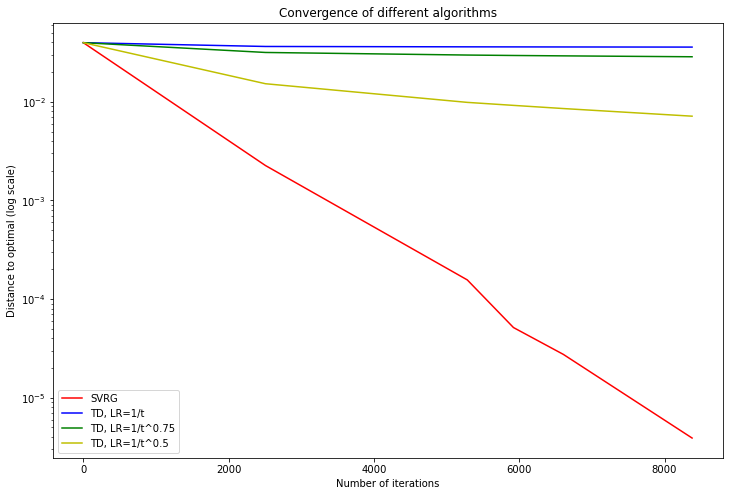

In [8]:
plt.figure(figsize=(12,8))
plt.title('Convergence of different algorithms')
plt.plot(result['milestones'], result['distances'], 'r', label='SVRG')
plt.plot(result['milestones'], result2['distances'], 'b', label='TD, LR=1/t')
plt.plot(result['milestones'], result3['distances'], 'g', label='TD, LR=1/t^0.75')
plt.plot(result['milestones'], result4['distances'], 'y', label='TD, LR=1/t^0.5')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Distance to optimal (log scale)')
plt.savefig('Experiment_results_exp1.png')

Number of updates in epoch: 3229
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Reached milestone 648
Reached milestone 2363
Reached milestone 3480
Reached milestone 4795
Reached milestone 8069
Reached milestone 648
Reached milestone 2363
Reached milestone 3480
Reached milestone 4795
Reached milestone 8069
Reached milestone 648
Reached milestone 2363
Reached milestone 3480
Reached milestone 4795
Reached milestone 8069
CPU times: total: 16 s
Wall time: 16.2 s


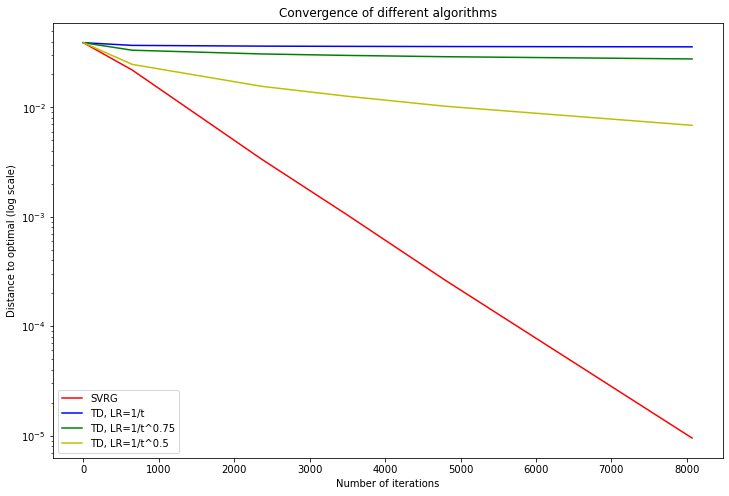

In [10]:
%%time
from SVRG_solver import solve

with torch.no_grad():
    experiment_results = {}
    problem_set = build_dataset(args)
    problem_set['theta_init'] =  torch.ones((f_dim, 1), dtype=args['dtype']).to(device)
    args['num_outer'] = 5
    for i in range(1,2):
        result = solve(problem_set, args)

from policy_iter_solve import solve as pi_solve
problem_set['milestones'] = result['milestones']

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 1
result2 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 0.75
result3 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 0.5
result4 = pi_solve(problem_set, args)

plt.figure(figsize=(12,8))
plt.title('Convergence of different algorithms')
plt.plot(result['milestones'], result['distances'], 'r', label='SVRG')
plt.plot(result['milestones'], result2['distances'], 'b', label='TD, LR=1/t')
plt.plot(result['milestones'], result3['distances'], 'g', label='TD, LR=1/t^0.75')
plt.plot(result['milestones'], result4['distances'], 'y', label='TD, LR=1/t^0.5')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Distance to optimal (log scale)')
plt.savefig('Experiment_results_exp2.png')

Number of updates in epoch: 3226
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Reached milestone 2651
Reached milestone 4182
Reached milestone 7203
Reached milestone 7880
Reached milestone 9510
Reached milestone 2651
Reached milestone 4182
Reached milestone 7203
Reached milestone 7880
Reached milestone 9510
Reached milestone 2651
Reached milestone 4182
Reached milestone 7203
Reached milestone 7880
Reached milestone 9510
CPU times: total: 18.1 s
Wall time: 18.2 s


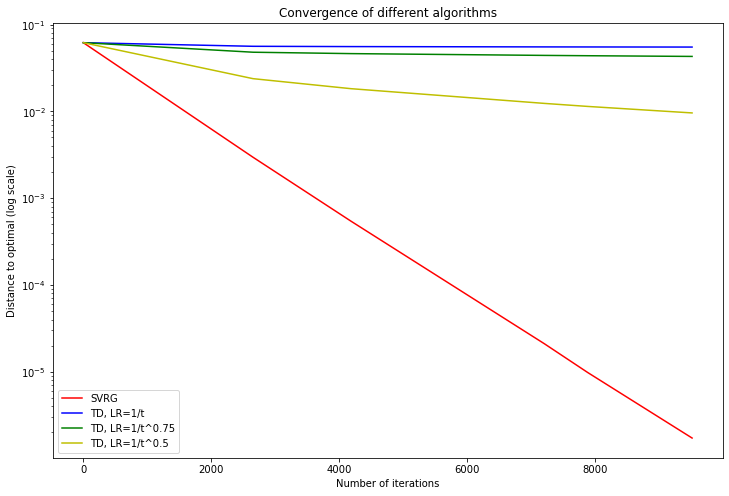

In [11]:
%%time
from SVRG_solver import solve

with torch.no_grad():
    experiment_results = {}
    problem_set = build_dataset(args)
    problem_set['theta_init'] =  torch.ones((f_dim, 1), dtype=args['dtype']).to(device)
    args['num_outer'] = 5
    for i in range(1,2):
        result = solve(problem_set, args)

from policy_iter_solve import solve as pi_solve
problem_set['milestones'] = result['milestones']

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 1
result2 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 0.75
result3 = pi_solve(problem_set, args)

args['learning_rate'] = 'decr_pow'
args['decay_rate'] = 0.5
result4 = pi_solve(problem_set, args)

plt.figure(figsize=(12,8))
plt.title('Convergence of different algorithms')
plt.plot(result['milestones'], result['distances'], 'r', label='SVRG')
plt.plot(result['milestones'], result2['distances'], 'b', label='TD, LR=1/t')
plt.plot(result['milestones'], result3['distances'], 'g', label='TD, LR=1/t^0.75')
plt.plot(result['milestones'], result4['distances'], 'y', label='TD, LR=1/t^0.5')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Distance to optimal (log scale)')
plt.savefig('Experiment_results_exp3.png')